In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt


In [7]:
data=pd.read_csv("Tuberculosis_Dataset.csv")

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 22 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Country                            400000 non-null  object 
 1   Year                               400000 non-null  int64  
 2   TB_Incidence_Rate                  400000 non-null  float64
 3   Population                         400000 non-null  int64  
 4   HIV_Prevalence                     400000 non-null  float64
 5   Treatment_Success_Rate             400000 non-null  float64
 6   Mortality_Rate                     400000 non-null  float64
 7   Urban_Population_Percentage        400000 non-null  float64
 8   Smoking_Rate                       400000 non-null  float64
 9   Alcohol_Consumption                400000 non-null  float64
 10  Healthcare_Expenditure_Per_Capita  400000 non-null  float64
 11  Primary_Healthcare_Access          4000

In [9]:
data.head()

,Country,Year,TB_Incidence_Rate,Population,HIV_Prevalence,Treatment_Success_Rate,Mortality_Rate,Urban_Population_Percentage,Smoking_Rate,Alcohol_Consumption,...,Age_Group,Gender,HIV_CoInfection_Rate,BCG_Vaccination_Coverage,Multidrug_Resistance_Rate,Unemployment_Rate,GDP_Per_Capita,Life_Expectancy,TB_Screening_Coverage,Rural_Population_Percentage
0,Country_52,2003,56.145286,788566,15.124856,63.008939,18.417301,39.939777,38.323440,13.115522,...,25-54,Female,4.491676,87.163577,1.405499,27.964788,98235.258489,41.642988,53.486072,89.256182
1,Country_15,2021,137.470346,1282706,1.365238,63.861596,25.804928,78.360506,48.317584,13.676533,...,0-14,Female,0.527789,61.848695,4.022342,29.374837,35130.172901,63.968269,76.473413,42.549955
2,Country_61,2014,179.814220,1100374,13.770958,92.017009,15.319141,27.609710,9.085422,3.070677,...,65+,Female,0.977231,63.133755,14.618375,23.704493,24703.776975,81.883098,59.468310,29.938714
3,Country_21,2014,124.211205,1141641,8.198825,94.747900,9.405584,73.239525,39.927303,7.360397,...,65+,Male,3.218930,55.069057,5.758827,21.854778,16417.483760,64.295034,96.677854,32.578901
4,Country_24,2011,50.394259,759040,4.472235,83.710431,37.830973,11.821832,48.280581,4.958237,...,55-64,Female,1.938210,70.991237,0.201211,23.512661,60373.614322,52.874425,88.048894,17.109448


In [11]:
data.head()

,Country,Year,TB_Incidence_Rate,Population,HIV_Prevalence,Treatment_Success_Rate,Mortality_Rate,Urban_Population_Percentage,Smoking_Rate,Alcohol_Consumption,...,Age_Group,Gender,HIV_CoInfection_Rate,BCG_Vaccination_Coverage,Multidrug_Resistance_Rate,Unemployment_Rate,GDP_Per_Capita,Life_Expectancy,TB_Screening_Coverage,Rural_Population_Percentage
0,Country_52,2003,56.145286,788566,15.124856,63.008939,18.417301,39.939777,38.323440,13.115522,...,25-54,Female,4.491676,87.163577,1.405499,27.964788,98235.258489,41.642988,53.486072,89.256182
1,Country_15,2021,137.470346,1282706,1.365238,63.861596,25.804928,78.360506,48.317584,13.676533,...,0-14,Female,0.527789,61.848695,4.022342,29.374837,35130.172901,63.968269,76.473413,42.549955
2,Country_61,2014,179.814220,1100374,13.770958,92.017009,15.319141,27.609710,9.085422,3.070677,...,65+,Female,0.977231,63.133755,14.618375,23.704493,24703.776975,81.883098,59.468310,29.938714
3,Country_21,2014,124.211205,1141641,8.198825,94.747900,9.405584,73.239525,39.927303,7.360397,...,65+,Male,3.218930,55.069057,5.758827,21.854778,16417.483760,64.295034,96.677854,32.578901
4,Country_24,2011,50.394259,759040,4.472235,83.710431,37.830973,11.821832,48.280581,4.958237,...,55-64,Female,1.938210,70.991237,0.201211,23.512661,60373.614322,52.874425,88.048894,17.109448


In [12]:
x=data[['TB_Incidence_Rate','HIV_Prevalence','Treatment_Success_Rate','Smoking_Rate','Alcohol_Consumption','HIV_CoInfection_Rate','BCG_Vaccination_Coverage','Multidrug_Resistance_Rate','GDP_Per_Capita','Unemployment_Rate']]

In [13]:
Y=data['Life_Expectancy']

In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,Y_train,Y_test=train_test_split(x,Y,test_size=0.2,random_state=44)

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error

In [17]:
model=LinearRegression()
model.fit(x_train,Y_train)

LinearRegression()

In [21]:
Y_pred=model.predict(x_test)
mse=mean_squared_error(Y_test,Y_pred)
r2=r2_score(Y_test,Y_pred)
print(r2)

-3.078763950847829e-05


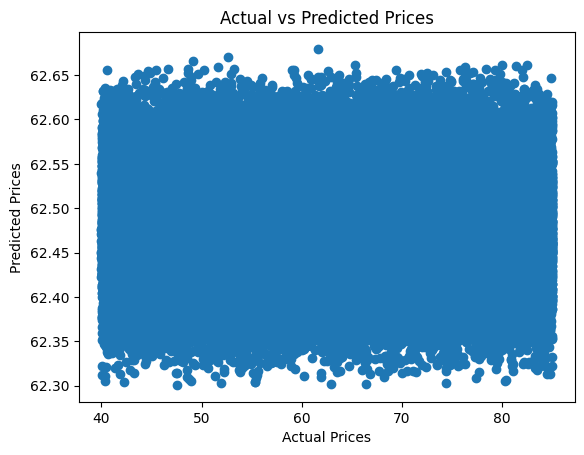

In [22]:

plt.scatter(Y_test, Y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.show()
